# Support Vector Machine (SVM) Classification: Linearly Separable Data

SVM is a discriminative learning algorithm that makes an **assumption on the form of the discriminant (decision boundary)** between the classes.

In a binary classification problem, the form of the SVM discriminant function is modeled by the **widest possible boundary** between the classes. That's why SVM is known as **large margin classifier**. 

The goal of the large margin SVM classifier is to maximize the margin between two classes. However it has to respect a **constraint**: 
    
    -- The margin should be maximized while making sure that data are correctly classified (i.e., data belonging to two classes are off the margin).

Hence the SVM classification can be modeled as a constrained maximization problem.

Depending on the nature of the data, the SVM constrained maximization algorithm varies.

To understand different SVM algorithms and approaches, we will consider several cases in this notebook series on SVM.

- Linearly Separable Data
        -- No Outlier
        -- Outlier
- Linearly Non-Separable Data
        -- Feature Augmentation
        -- Kernelized SVM: Polynomial Kernel
        -- Kernelized SVM: Gaussian Radial Basis Function (RBF) Kernel



## Index for the Notebook Series on SVM Classifier

There are 5 notebooks on SVM based classifiers.

1. Support Vector Machine-1-Linearly Separable Data
        -- Hard margin & soft margin classifier using the LinearSVC model
2. Support Vector Machine-2-Nonlinear Data
        -- Polynomial models with LinearSVC and Kernelized SVM (Polynomial & Gaussian RBF kernel)
3. Support Vector Machine-3-Gaussian RBF Kernel
        -- In depth investigation of Gaussian RBF Kernel (how to fine tune the hyperparameters)

Finally, we will apply SVM on **two application scenarios**. We will see that these two applications require two very different SVM algorithms (linear and complex models). We will conduct in dept investigations on these two models in the context of these two applications.
- Application 1 - Image Classification (Gaussian RBF model performs well & why)
- Application 2 - Text Classification (LinearSVC performs well & why)


In this notebook we will investigate the Support Vector Machine (SVM) algorithm in the context of **linearly separable** data. Our goal is to develop a mathematical understanding of the SVM algorithm.


## Mathematical Foundation of SVM

There are at least two very different ways to find the maximum margin decision boundary.

- Modeling the max margin problem as a constrained optimization problem and solove it using Quadratic Programming (QP) solver
- Modeling the max margin problem as an unconstrained optimization problem and solve it using Gradient Descent/coordinate descent 


### Constrained Optimization Problem

We can model the max margin problem as a constrained optimization problem in two ways.
- Primal Problem (computationally expensive for large feature dimension)
- Dual Problem


### Primal Problem

The SVM finds the max margin decision boundary by solving the following constrained optimization problem.

$min_{\vec{w}, b} \frac{1}{2}\vec{w}^T.\vec{w} + C\sum_{i=1}^{N} \xi_i$

Subject to the following constraints:

$y_i(\vec{w}^T.\vec{x}_i + b) \geq 1 - \xi_i$   $\forall i$

$\xi_i \geq 0$



Here:
- $\xi$: slack variable that controls margin violation. \#($\xi > 0$) = the number of non-separable points (measure of error/misclassification).

- C: regularization/penalty. Controls the trade-off between margin maximization and error minimization.

This convex optimization problem is known as the **primal problem** and its complexity depends on feature dimension.

We can use a Quadratic Programming (QP) solver to find optimal $\vec{w}$ and b for the primal problem:
https://cvxopt.org/


     
### Dual Problem 

Due to the computational complexity of the primal optimization (minimization) problem, we transform it into a form such that its complexity no more depends on the feature dimension, instead depends on the size of the data. This new form is known as the dual form and we solve the **dual optimization (maximization) problem**.

$max_{\alpha_1, ..\alpha_N} \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j \vec{x_i}^T.\vec{x_j} $

Subject to the constraints:

$\sum_{i=1}^{N}\alpha_i y_i = 0$

$\alpha_i \geq 0 $

Here $\alpha$ is the Lagrange multiplier.

The complexity of the dual problem depends on the size of the training data (N), not on the feature dimension. Thus, for high-dimensional data, solving the dual problem is much more efficient than solving the primal problem.



##### Since we are using linearly separable data in this notebook, we will not have to solve the dual version of the problem. This knowledge will be useful for setting the "dual" hyperparameter.



## Unconstrained Optimization Problem for Gradient Descent

We can implement the gradient descent (GD) or stochastic gradient descent (SGD) or coordinate descent (CD) based approach to find optimal $\vec{w}$ and $b$ for the SVM classsifier. The SGD aproach is useful for **online learning**.

To apply these iterative optimazation approaches for the SVM, we define the cost function as follows.


$min_{\vec{w},b}\frac{1}{2}\vec{w}^T.\vec{w} + C\sum_{i=1}^{N}h(y_i(\vec{w}^T.\vec{x}_i + b)) $


Here:
- $h(z)$: the Hinge loss function: $h(z) = max(0, 1 - z)$
- C: regularization/penalty. Controls the trade-off between margin maximization and error minimization.

The Hinge loss function varies between 0 and $(1 - y_i(\vec{w}^T.\vec{x}_i + b))$. It represents the error/loss due to misclassification.

<img src="https://cse.unl.edu/~hasan/SVM1.png" width=400 height=200>

Observe that the Hinge loss or cost function of SVM is similar to the Linear Regression and Logistic Regression regularized cost function.

In case of SVM:
- The first term is the regularization/penalty term
- The second term is the loss objective function

Unlike Linear/Logistic regression, the regularization/penalty parameter (C) is with the loss function.


It's a hyperparameter that controls the trade-off between margin maximization and error minimization.
     - If C is too large, we have a high penalty for nonseparable points, and we may store many support vectors and overfit. 
     - If C is too small, we may find too simple solutions that underfit. 
     


## SVM using Scikit-Learn


Scikit-Learn provides four SVM models to perform classification:

- SVC (Solves the dual optimization problem. Used to implement kernelized SVM, such as polynomial kernel, Gaussian Radial Basis Function or RBF kernel)
- LinearSVC (Uses the Coordinate Descent approach. Similar to SVC with linear kernel)
- NuSVC (Nu-Support Vector Classification. Similar to SVC but uses a parameter to control the number of support vectors)
- SGDClassifier (Uses Stochastic Gradient Descent approach)

We will investigate both SVC and LinearSVC in greater detail. Also for the image classsification application we will use the SGDClasssifier.


## Scikit-Learn SVM Model Complexity


- SVC: $O(N^2d)$ ~ $O(N^3d)$
- LinearSVC: $O(Nd)$ 

N: No. of training data

d: No. of features


The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features ($O(Nd)$). Moreover, the LinearSVC class has more flexibility in the choice of penalties (l2 & l1) and loss functions. 


The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick. Due to its complexity between $O(N^2d)$ ~ $O(N^3d)$, it gets dreadfully slow when N gets large (e.g., hundreds of thousands of instances). However, SVC is perfect for **complex but small or medium** training sets. It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). 


## How do We Choose the Optimal Model (between SVC & LinearSVC)?

Model selection is done by hyperparameter tuning. We can choose both the algorithm (LilearSVC, SVC with varying kernels) and the optimal hyperparameters via cross-validated grid search.

However, brute-force grid search is time consuming. We should have a high-level understanding of the suitability of the algorithms based on the dataset. Then, we can fine tune the hyperparameters.

So, before doing any Machine Learning with SVM, we should address these questions.

- How do we choose the most suitable model between LinearSVC and SVC?
- If SVC is suitable, then how do we choose the optimal kernel (usually between polynomial and RBF)?



# Guideline (Rough) to Choose the Suitable Model Based on the Data

- N is very large but d is small ($N > d$): LinearSVC
- d is large relative to N ($d \geq N$): LinearSVC
- N is small to medium and d small ($N > d$): SVC with Gaussian RBF kernel


In this notebook we will classify a linearly separable dataset. Both N and d are small in this dataset. Also, it is linearly separable.

Thus, will use the **LinearSVC** model. 



## LinearSVC Class: Hyperparameter Setting:

- The "loss" hyperparameter should be set to "hinge". 

- The hyperparameter "C" controls the penalty for the error (margin violation). It should be selected via grid search. We will investigate its effect shortly.

- Finally, for better performance we should set the "dual" hyperparameter to False, unless there are more features than training instances.



### Scaling

The SVM classfication is influenced by the varying scale of the features. 

SVMs try to fit the largest possible “street” between the classes. So if the training set is not scaled, the SVM will tend to neglect small features. 


Thus, we should standardize the data before training.


## Linearly Separable Data: Two Cases

We will consider two cases.

- Data doesn't have outlier
- Data has outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

np.random.seed(43)

## No Outlier: Hard Margin Classification


We will use a synthetic dataset that doesn't have any outlier. We will implement the SVM by imposing all instances be off the street and on the right side. 

This is called **hard margin classification**.

## Synthetic Dataset for Hard Margin Classification

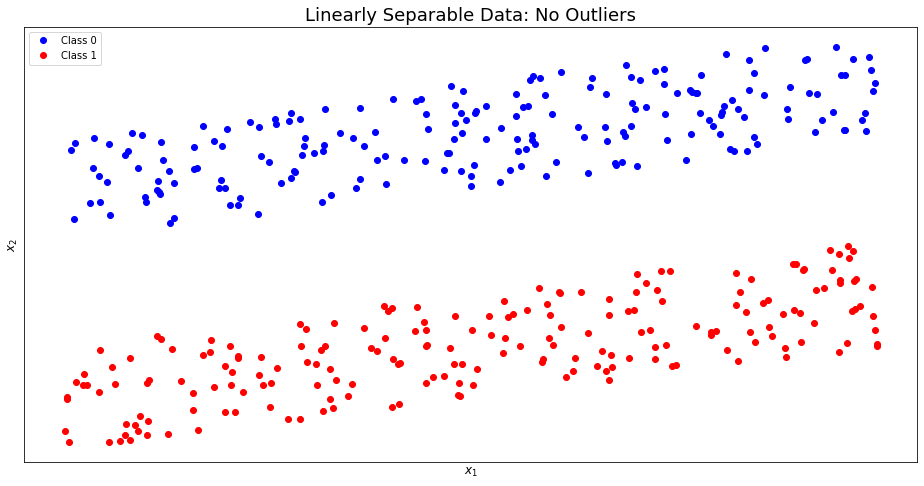

In [2]:
m0 = 200  # no. of training examples for class 0


# Generate class 0 data points randomly from a uniform distribution
#    Here a & b are 2 dimensions for each data (feature) point
a = np.random.rand(m0,1)
b = 4 + a + np.random.rand(m0,1)


# Concatenate the 2 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((a, b), axis=1)

# Create the target vector for class 0 (target is coded with zeros)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)


m1 = 200  # no. of training examples for class 1


# Generate class 1 data points randomly from a uniform distribution
#    Here c & d are 2 dimensions for each data (feature) point
c = np.random.rand(m1,1)
d = 6 + c + np.random.rand(m1,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 1
X1 = np.concatenate((c, d), axis=1)


# Create the target vector for class 1 (target is coded with ones)
X1_target = np.ones((m1,), dtype=np.int).reshape(-1, 1)



# All training examples for class 0 and 1
X = np.append(X0, X1, axis=0)

# All target values for class 0 & 1
y = np.concatenate((X0_target, X1_target), axis=0)


# Create a 1D row vector ofthe target with float values
y = y.ravel()*1.0
#print(y)



# Draw a scatter plot
plt.figure(figsize=(16,8))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")
plt.title("Linearly Separable Data: No Outliers", fontsize=18)
plt.legend(loc=2)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.xticks(())
plt.yticks(())
plt.show()

## Train the Linear SVC Model

We scale the data first. Then, train the model.

For performing these two tasks we deine a pipeline object.

In [3]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

## Understanding the Performance of the LinearSVC Model

To know whether the model created hard margin classification or not, we need to **visualize the decision boundary and the two margins**.


### Drawing Decision Boundary


In the SVM, the decision boundary is **solely determined by the support vectors**. Thus, to draw the decision boundary, we need to get the support vectors.

Unfortunately, the LinearSVC model does not give the support vectors directly (however, SVC does). Thus, we will have to compute the support vectors for drawing the decision boundary.

Let's present the equations for calculating the support vectors.

### Calculating The Support Vectors

First, we state the decision rule for a single sample $\vec{x}$:

$\vec{w^T}.\vec{x} + b \geq 1$, then class = positive (+1), otherwise negative (-1).

The decision boundary is perpendicular to $\vec{w}$ and its displacement from the origin is controlled by the bias $b$.


For the entire dataset $\vec{X}$ and class label $\vec{t}$ (represents the class labels -1/+1 of each sample in the dataset), the decision rule can be written as follows.

$\vec{t} * (\vec{X}.\vec{w} + b) \geq 1$

For sample $i$, if $t_i = +1$ (belongs to positive class), then

$\vec{w}^T.\vec{x}_i + b \geq 1$

However, if $t_i = -1$ (belongs to negative class), then

$\vec{w}^T.\vec{x}_i + b) \leq -1$

From the above decision rule we derive the fact that the support vectors that reside on the decision surface satisfy the following equation:

$\vec{t} * (\vec{X}.\vec{w} + b) < 1$

We will use this equation to compute the support vectors. For this we need to get the weight coefficients ($\vec{w}$) and bias ($b$). The LinearSVC model provides these weight values by the following two attributes.

- coef_: Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

- intercept_ : Constants in decision function.

However, there is an issue.

We used **scaled data** to train the LinearSVC model. For computing the support vectors we need the **unscaled weight parameters**.


### Unscaling Weight Parameters

To unscale the weight parameters, we do the following.

$\vec{w}_{unscaled} = \vec{w}_{scaled}/std$

$b_{unscaled} = b_{scaled} - (mean/std)*\vec{w}_{scaled}$
 

We can get:
- the $\vec{w}_{scaled}$ values from the coef_ attribute of the model.
- the $\vec{b}_{scaled}$ values from the intercept_ attribute of the model.
- the data mean and std from scaler.mean_ and scaler.scale_.


We define a function to compute the support vectors.

In [4]:
def compute_support_vectors(svm_clf, scaler, X, y):
    w_unscaled = svm_clf.coef_[0] / scaler.scale_


    b_scaled = svm_clf.intercept_
    #print("b_scaled: ", b_scaled)

    # Following term is subtracted from the b_scaled
    b_subtract = [(svm_clf.coef_[0]).T.dot(-scaler.mean_ / scaler.scale_)]
    #print("b_subtract: ", b_subtract)

    b_unscaled = np.array(b_scaled + b_subtract)
    #print("b_unscaled: ", b_unscaled)

    # Update the weight and intercept of the model with the unscaled weight parameters
    svm_clf.intercept_ = np.array([b_unscaled])

    svm_clf.coef_ = np.array([w_unscaled])
    
    
    # Now compute the support vectors.

    # The original class labels are 0 and 1.
    # We need to transform them to -1 and 1.
    t = y * 2 - 1


    # Note that the data points are classified according to the following rule:
    #  (t * (X.dot(w) + b) >= 1)
    # Thus the support vectors will satisfy: (t * (X.dot(w) + b) < 1)

    support_vectors_idx = (t * (X.dot(w_unscaled) + b_unscaled) < 1).ravel()

    svm_clf.support_vectors_ = X[support_vectors_idx]


    return svm_clf


## Compute the Support Vectors

In [5]:
svm_clf = compute_support_vectors(svm_clf, scaler, X, y)

print("Support Vectors:")
print(svm_clf.support_vectors_)

Support Vectors:
[[0.7337483  5.72579411]
 [0.96348912 5.95674182]
 [0.64390716 6.65207319]
 [0.70499668 6.71594282]
 [0.76499941 6.77956999]]


# Decision Bounday 

We provide two techniques for plotting the class decision boundary for a binary classification problem.

1. Using the Support Vectors
2. Using Class Prediction 

The 1st technique is handy for binary classification problems. It helps us to understand the math for constructing the decision boundary using support vectors.

The 2nd technique is simple and easy to extend to non-linear dataset. We will use it more often.

## 1. Decision Bounday: Using the Support Vectors

We will use the support vectors to 
- plot the decision boundary and
- the two margins 


### Plot Decision Boundary
The equation for the decision boundary for a single 2D data point is:

$\vec{w^T}.\vec{x} = 0$

$=> w_1*x_1 + w_2*x_2 + b = 0$

$=> x_2 = -w_1/w_2 * x_1 - b /w_2$

$=> x_2 = -(b + w_1*x_1)/w_2$

By using a range of values for $x_1$, we will generate the range of $x_2$ values. Then, we will plot the decision boundary by using $x_1$ and $x_2$ values.


### Plot the Two Margins

We can write the equations for the two margins by using the following equation of the decision boundary for a single data point:

$w_1*x_1 + w_2*x_2 + b = 0$

The equations for two margins are:

$w_1*x_1 + w_2*x_2 + b = +1$


$w_1*x_1 + w_2*x_2 + b = -1$

Let's consider the equation of the margin for the positive class (+1).

$w_1*x_1 + w_2*x_2 + b = +1$

$=> w_1*x_1 + w_2*x_2 - 1 + b = 0$

$=> w_1*x_1 + w_2*(x_2 - \frac{1}{w_2}) + b = 0$

Thus, we obtain this margin by **shifting the decision boundary** by the amount $\frac{1}{w_1}$.

Similarly consider the equation of the margin for the negative class (-1).

$w_1*x_1 + w_2*x_2 + b = -1$

$=> w_1*x_1 + w_2*x_2 + 1 + b = 0$

$=> w_1*x_1 + w_2*(x_2 + \frac{1}{w_2}) + b = 0$

Thus, we obtain this margin by shifting the decision boundary by the amount $\frac{1}{w_2}$.


In short, the **distance of the two margins from the decision boundary** is: $\frac{1}{w_2}$


### Helper Function to Plot Decision Boundary and Two Margins

We define the following helper function to plot the decision boundary and the two margins.

The weight vector $\vec{w}$ and the intercept $b$ values can be obtained by using the following two model functions respectively: 
 - coef_

- intercept_

In [6]:
def decision_boundary_support_vectors(svm_clf, X):
    
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w1*x1 + w2*x2 + b = 0
    # => x2 = -(b + w1* x1)/w1
    x1 = np.linspace(xmin, xmax, 100)
    
    decision_boundary = -(b + w[0]*x1)/w[1]

    shifting_factor_for_margin = 1/w[1]
    upper_margin = decision_boundary + shifting_factor_for_margin
    lower_margin = decision_boundary - shifting_factor_for_margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='g', label="Support Vectors")
    plt.plot(x1, decision_boundary, "k-", linewidth=2)
    plt.plot(x1, upper_margin, "k--", linewidth=2)
    plt.plot(x1, lower_margin, "k--", linewidth=2)

## Plot Decision Boundary and the Margins

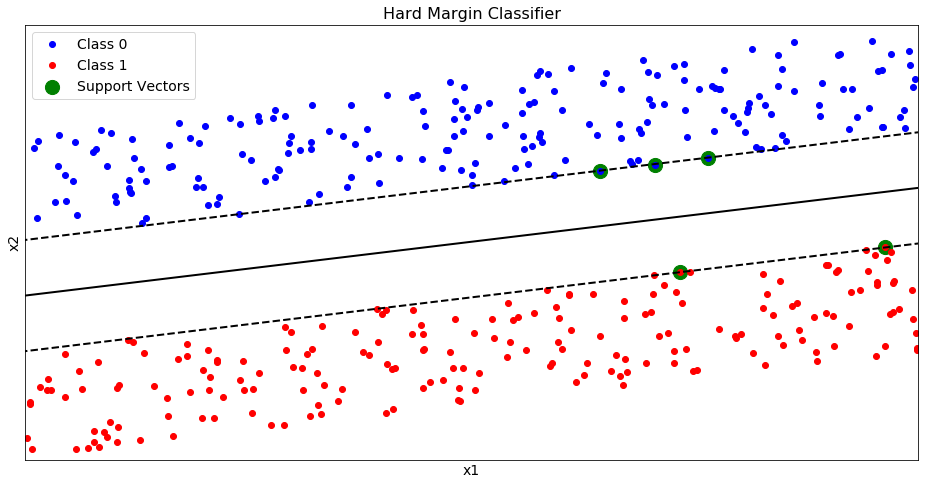

In [7]:
plt.figure(figsize=(16,8))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")

decision_boundary_support_vectors(svm_clf, X)

plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("Hard Margin Classifier", fontsize=16)
plt.axis([0, 1, 4, 8])
plt.xticks(())
plt.yticks(())
plt.show()

## 2. Decision Bounday: Using Class Prediction


We can show the decision boundary by using **different colors for different class labels**.

First, create a mesh grid of data points. Then, predict the class labels of these new data points.

Finally using the contour plot, display the class-colored data points. Samples belonging to the same class will be coded with the same color. As a consequence we will be able to visualize the **boundary between the classes by the color variance**.


To better display the class-colored data points, we will use a **filled contour plot by using the plt.contourf() function**. 

We may add a **plt.colorbar()** command, which automatically creates an additional axis with labeled color information for the plot.

For predicting class labels, we use the "predict()" function of the model.

#### Plotting the signed distance of the samples to the hyperplane

To make this plot more interesting and informative, we can draw the **signed distance of the samples to the hyperplane**.

The model provides these distance values by the function "decision_function()".

Using this function we compute the **signed distance of the samples from the grid to the hyperplane**.

First we create a grid of $x_1$ values and a grid of $x_2$ values. The $x_1$ and $x_2$ values represent positions on the plot. We use the np.meshgrid function to create this grid.

Then, we compute the **signed distance of the samples from the grid to the hyperplane** by using decision_function.

Finally we create a contour plot of the signed distances on the grid.


To generate class-colored decision bounday, we write the following function.


In [8]:
def decision_boundary_svc_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contour plot for the distance of all points from the hyperplane and the two margins
        plt.contour(x1, x2, y_decision, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='black')
        
        
        #plt.pcolormesh(x1, x2, -y_decision, cmap=plt.cm.RdBu)
        
        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()   

## Plot The Decision Boundary Based on Class Predictions

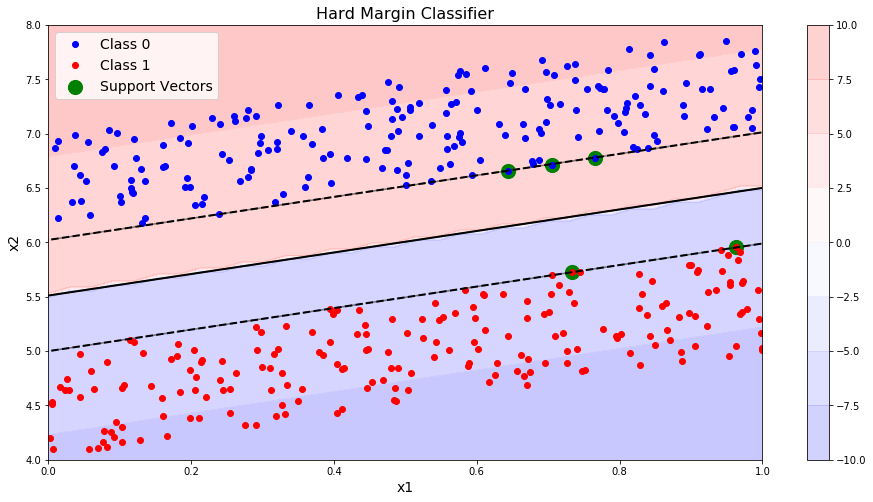

In [9]:
plt.figure(figsize=(16,8))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")

decision_boundary_svc_class_colored(svm_clf, X, plotDistanceFromHyperplane=True, colorBar=True)

# We can plot the support vectors on the margin
decision_boundary_support_vectors(svm_clf, X)

plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("Hard Margin Classifier", fontsize=16)
plt.axis([0, 1, 4, 8])
plt.show()

# Linearly Separable Data: Outlier

There are two main issues with hard margin classification. 

- It only works if the data is linearly separable.
- It is quite sensitive to outliers.

If data has outliers, then it's not possible to find hard margin. To avoid this problem we use **Soft margin classifier**.

Soft margin classifiers provide a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side).

In Scikit-Learn’s SVM classes, we can control this balance by using the C hyperparameter. 
- A smaller C value leads to a wider street but more margin violations. 
- A larger C value leads to a narrower street reducing violations.

We will illustrate this using the synthetic dataset. We will build two LinearSVC models with small C (=1) and large C (=100) values.

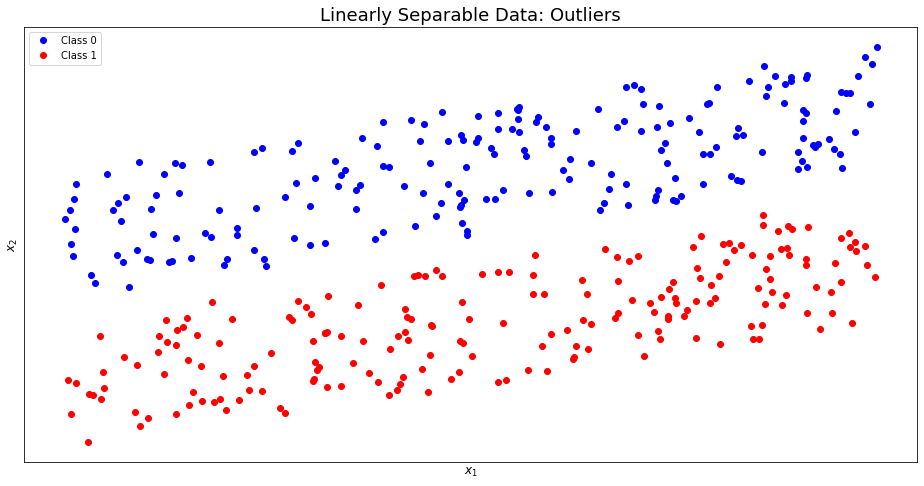

In [10]:
m0 = 200  # no. of training examples for class 0


# Generate class 0 data points randomly from a uniform distribution
#    Here a & b are 2 dimensions for each data (feature) point
a = np.random.rand(m0,1)
b = 4 + a + np.random.rand(m0,1)


# Concatenate the 2 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((a, b), axis=1)

# Create the target vector for class 0 (target is coded with zeros)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)


m1 = 200  # no. of training examples for class 1


# Generate class 1 data points randomly from a uniform distribution
#    Here c & d are 2 dimensions for each data (feature) point
c = np.random.rand(m1,1)
d = 5.2 + c + np.random.rand(m1,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 1
X1 = np.concatenate((c, d), axis=1)


# Create the target vector for class 1 (target is coded with ones)
X1_target = np.ones((m1,), dtype=np.int).reshape(-1, 1)



# All training examples for class 0 and 1
X = np.append(X0, X1, axis=0)

# All target values for class 0 & 1
y = np.concatenate((X0_target, X1_target), axis=0)


# Create a 1D row vector ofthe target with float values
y = y.ravel()*1.0
#print(y)


# Draw a scatter plot
plt.figure(figsize=(16,8))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")
plt.title("Linearly Separable Data: Outliers", fontsize=18)
plt.legend(loc=2)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.xticks(())
plt.yticks(())
plt.show()


## Scale the Data and Train Two Linear SVC Models

In [11]:
scaler = StandardScaler()


svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])


scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

## Compute The Support Vectors for Two Models

In [12]:
svm_clf1 = compute_support_vectors(svm_clf1, scaler, X, y)
svm_clf2 = compute_support_vectors(svm_clf2, scaler, X, y)

## Plot Decision Boundary and the Margins

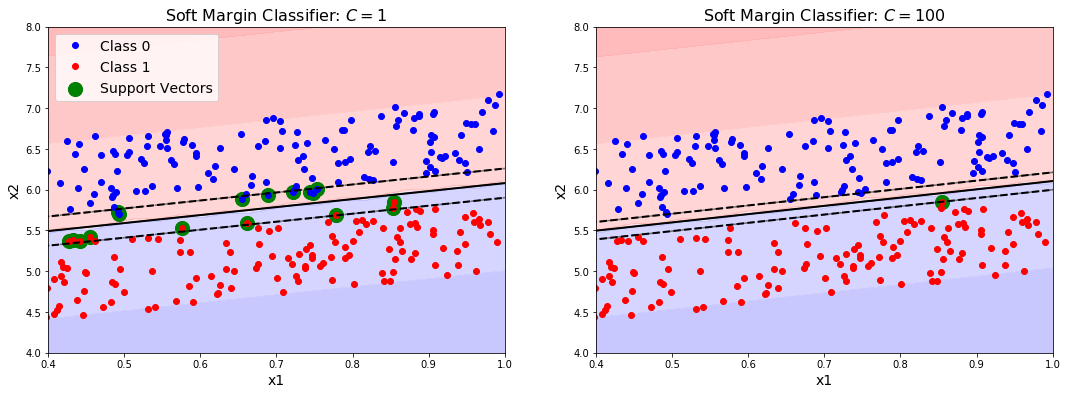

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)


plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")

decision_boundary_svc_class_colored(svm_clf1, X, plotDistanceFromHyperplane=True, colorBar=False)

# We can plot the support vectors on the margin
decision_boundary_support_vectors(svm_clf1, X)

plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("Soft Margin Classifier: $C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([0.4, 1, 4, 8])




plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")

decision_boundary_svc_class_colored(svm_clf2, X, plotDistanceFromHyperplane=True, colorBar=False)

# We can plot the support vectors on the margin
decision_boundary_support_vectors(svm_clf2, X)

plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
#plt.legend(loc="best", fontsize=14)
plt.title("Soft Margin Classifier: $C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([0.4, 1, 4, 8])
plt.show()